In [14]:
import sys
import os
import datetime
import pandas as pd
import pandas_ta as ta
import numpy as np
sys.path.append(r"C:\Users\DeGenOne\degen-money-backtest")
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 5000)

In [24]:
from backtest.data import data
from backtest.strategy.strategy import Strategy
from backtest.utils import utils
from backtest.opt_backtest.opt_backtest import OptBacktest


In [28]:
instrument = "BANKNIFTY"
start_date = "2019-01-01"
end_date = "2019-12-31"
timeframe = "1min"
historical_data_obj = data.DataProducer(instrument, start_date, end_date, timeframe)

In [29]:
df = historical_data.resampled_historical_df
df["day"] = df["date"].dt.date
df = df[df["date"].dt.year == 2019]
day_groups = df.groupby("day")

In [30]:
start_time = utils.str_to_time_obj("9:20")
instrument = "BANKNIFTY"

In [31]:
ce_options_data = []
pe_options_data = []
for day, day_df in day_groups:
    curr_week_expiry_dt = historical_data_obj.get_closet_expiry(instrument, day, week_number=0)
    expiry_comp = historical_data_obj.get_expiry_comp_from_date(instrument, curr_week_expiry_dt)
    entry_close_price = day_df.loc[day_df["date"].dt.time == start_time, "close"].iloc[0]
    entry_atm = int(round(entry_close_price, -2))
    ce_opt_symbol = utils.get_opt_symbol(instrument, expiry_comp, entry_atm - 500, "CE")
    pe_opt_symbol = utils.get_opt_symbol(instrument, expiry_comp, entry_atm + 500, "PE")
    ce_symbol_data = data.fetch_options_data_and_resample(ce_opt_symbol, day, day, "1min")
    ce_symbol_data = ce_symbol_data.rename(columns={f"{ce_opt_symbol}_close":"close", f"{ce_opt_symbol}_open":"open", f"{ce_opt_symbol}_high": "high",
                                                    f"{ce_opt_symbol}_low":"low", f"{ce_opt_symbol}_volume":"volume"})
    pe_symbol_data = fetch_options_data_and_resample(pe_opt_symbol, day, day, "1min")
    pe_symbol_data = pe_symbol_data.rename(columns={f"{pe_opt_symbol}_close":"close", f"{pe_opt_symbol}_open":"open", f"{pe_opt_symbol}_high": "high",
                                                    f"{pe_opt_symbol}_low":"low", f"{pe_opt_symbol}_volume":"volume"})
    ce_options_data.append(ce_symbol_data)
    pe_options_data.append(pe_symbol_data)

AttributeError: module 'backtest.data.data' has no attribute 'get_closet_expiry'

In [ ]:
ce_options_df = pd.concat(ce_options_data, ignore_index=True)
pe_options_df = pd.concat(ce_options_data, ignore_index=True)

In [47]:

expiry_dates = data.bnf_expiry_dates_list
expiry_comp_dict = data.bnf_expiry_comp_dict
filtered_expiry = []
for x in expiry_dates:
    if x.year == 2019:
        filtered_expiry.append(x)
filtered_df = df[df['date'].dt.date.isin(filtered_expiry)]
filtered_df.reset_index(drop=True, inplace=True)
filtered_df = filtered_df.groupby("day")
ce_options_data = []
pe_options_data = []

track_time = utils.str_to_time_obj("9:20")

for day, day_df in filtered_df:
    close = day_df[day_df["date"].dt.time == track_time]["close"]
    atm = int(round(close, -2))
    ce_otm5 = atm - 500
    pe_otm5 = atm + 500
    expiry_comp = expiry_comp_dict[day]
    ce_opt_symbol = f"BANKNIFTY{expiry_comp}{ce_otm1}CE"
    pe_opt_symbol = f"BANKNIFTY{expiry_comp}{pe_otm1}PE"
    ce_symbol_data = fetch_options_data_and_resample(ce_opt_symbol, day, day, "30min")
    ce_symbol_data = ce_symbol_data.rename(columns={f"{ce_opt_symbol}_close":"close",
                                                 f"{ce_opt_symbol}_open":"open",
                                                  f"{ce_opt_symbol}_high": "high",
                                                    f"{ce_opt_symbol}_low":"low",
                                                    f"{ce_opt_symbol}_volume":"volume"})
    pe_symbol_data = fetch_options_data_and_resample(pe_opt_symbol, day, day, "30min")
    pe_symbol_data = ce_symbol_data.rename(columns={f"{pe_opt_symbol}_close":"close",
                                                 f"{pe_opt_symbol}_open":"open",
                                                  f"{pe_opt_symbol}_high": "high",
                                                    f"{pe_opt_symbol}_low":"low",
                                                    f"{pe_opt_symbol}_volume":"volume"})
    ce_options_data.append(ce_symbol_data)
    pe_options_data.append(pe_symbol_data)
ce_options_df = pd.concat(ce_options_data, ignore_index=True)
pe_options_df = pd.concat(ce_options_data, ignore_index=True)

In [48]:
# display(ce_options_df)
ce_options_df["date"] = pd.to_datetime(ce_options_df["date"])
ce_options_df["rsi"] = ta.rsi(ce_options_df["close"], window=20)
ce_options_df.dropna(inplace=True)
ce_options_df.reset_index(drop=True, inplace=True)
ce_options_df["time"] = ce_options_df["date"].dt.time
ce_options_df.set_index("date", inplace=True)

# display(ce_options_df)
# ce_options_df[ce_options_df["date"].dt.date == datetime.datetime()]

In [49]:
ce_options_df

,open,high,low,close,volume,rsi,time
date,,,,,,,
2019-01-10 09:45:00,27.20,33.00,25.20,28.70,3138560.0,44.856245,09:45:00
2019-01-10 10:15:00,28.45,40.80,26.15,27.90,4279580.0,44.218784,10:15:00
2019-01-10 10:45:00,27.50,30.30,18.15,20.80,3772320.0,38.930938,10:45:00
2019-01-10 11:15:00,20.60,22.65,17.35,20.25,2344240.0,38.546395,11:15:00
2019-01-10 11:45:00,20.15,22.00,8.00,10.35,4996060.0,32.351888,11:45:00
2019-01-10 12:15:00,10.40,16.90,9.10,13.65,4105180.0,36.041532,12:15:00
2019-01-10 12:45:00,13.65,14.30,9.00,11.70,3281780.0,34.832551,12:45:00
2019-01-10 13:15:00,11.90,13.35,3.90,4.80,6630720.0,30.884717,13:15:00
2019-01-10 13:45:00,4.80,5.85,2.90,3.80,5654780.0,30.347885,13:45:00


In [50]:
ce_options_df["change"] = ce_options_df["close"].shift(-1) - ce_options_df["close"]
ce_options_df["rsi"] = ce_options_df["rsi"].apply(lambda x: np.where(x < 55, -1, x))
ce_options_df["rsi"] = ce_options_df["rsi"].apply(lambda x: np.where(x > 65, 1, x))
ce_options_df["rsi"] = ce_options_df["rsi"].apply(lambda x: np.where(abs(x) == 1, x, 0))

In [51]:
pp = ce_options_df[["rsi", "change", "time"]]

In [52]:
pp = pp[pp["time"] <= datetime.time(15, 0)]

In [53]:
pp[pp["rsi"] == 1]

,rsi,change,time
date,,,
2019-01-24 09:15:00,1.0,2.70,09:15:00
2019-01-24 09:45:00,1.0,6.50,09:45:00
2019-01-24 10:15:00,1.0,-13.85,10:15:00
2019-01-31 11:15:00,1.0,-3.40,11:15:00
2019-01-31 11:45:00,1.0,-13.75,11:45:00
2019-01-31 12:45:00,1.0,96.50,12:45:00
2019-01-31 13:15:00,1.0,-39.85,13:15:00
2019-01-31 13:45:00,1.0,57.35,13:45:00
2019-01-31 14:15:00,1.0,97.10,14:15:00


In [54]:
pp.groupby("rsi")["change"].sum()

rsi
-1.0   -848.80
 0.0   -618.90
 1.0    408.45
Name: change, dtype: float64

In [55]:
pp = pp[pp["rsi"] == 1]

<Axes: xlabel='time'>

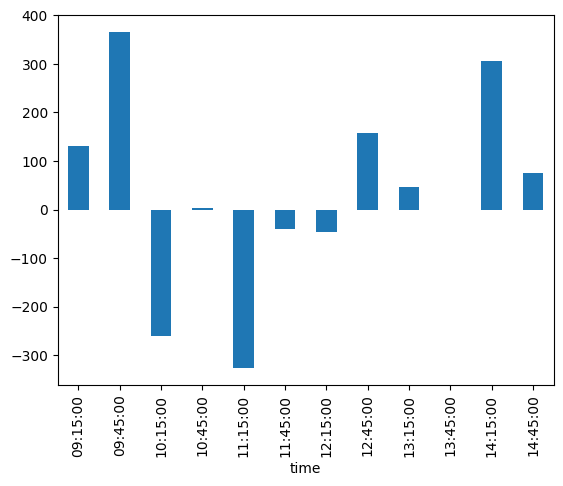

In [56]:
pp.groupby("time").sum()["change"].plot(kind="bar")